# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [54]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    niter = 0
    x = x0 + 2 * eps
    
    while True:
        
        x = x0 - f(x0) / fder(x0)
        niter += 1
        
        if abs(x - x0) <= eps or niter == maxiter:
            break
            
        x0 = x
    
    return x, niter

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [261]:
f = lambda x: x**2 - 1

fder = lambda x: 2 * x

x0 = 0.5

x, niter = newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000)

print(x, niter)

1.000000000000001 5


Алгоритм работает, корень найден верно.

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [241]:
def newton_iteration_modify(f, fder, x0, m, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    niter = 0
    x = x0 + 2 * eps
    points = []
    
    while True:
        
        points.append(x0)
        
        x = x0 - m * f(x0) / fder(x0)
        niter += 1
        
        if abs(x - x0) <= eps or niter == maxiter:
            break
            
        x0 = x
    
    return x, niter, np.array(points)

Применим метод Ньютона для различных $m$. Скорость сходимости будем оценивать как тангенс угла наклона логарифмического графика $\left \|x_n - x \right \|$ от $\left \|x_{n-1} - x \right \|$, поскольку имеется оценка

$$
\left \|x_n - x \right \| \leq \alpha \left \|x_{n-1} - x \right \|^{\beta},
$$

где $\alpha \in (0, 1)$, $x$ -- корень уравнения, $\beta$ -- показатель сходимости. Если $\beta = 1$, то сходимость линейна, если $\beta = 2$, то квадратична. Для нахождения тангенса угла наклона полученные точки аппроксимируются линейной зависимостью.

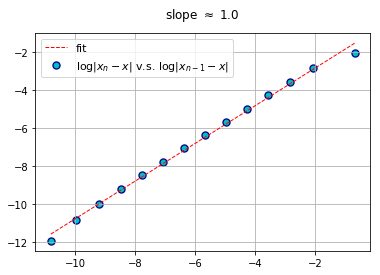

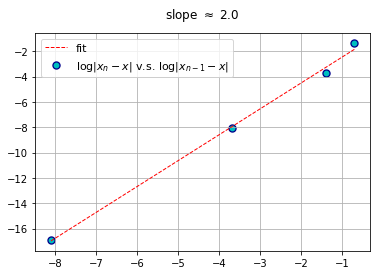

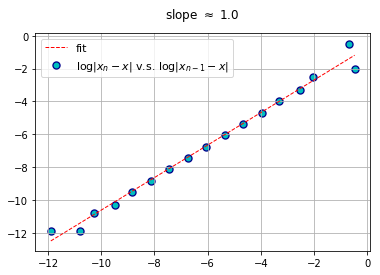

/Users/fedorzavialov/PycharmProjects/СompPhys/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/Users/fedorzavialov/PycharmProjects/СompPhys/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/Users/fedorzavialov/PycharmProjects/СompPhys/venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


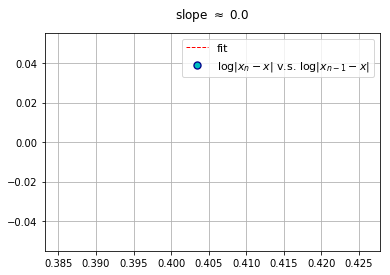

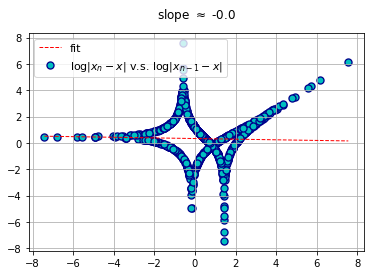

In [260]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

f = lambda x :(x**2 - 1)**2

fder = lambda x: 4 * x * (x**2 - 1)

x0 = 0.5

m_test = [1, 2, 3, 4, 5]

for m in m_test:
    
    x, niter, points = newton_iteration_modify(f, fder, x0, m, eps=1e-5, maxiter=1000)
    
    errors = np.abs(points - x)
    
    y = np.log(errors[1:])
    x = np.log(errors[:-1])
    
    x_opt = np.linspace(np.min(x), np.max(x), 30)
    def f_opt(x_opt, a, b):
        return a * x_opt + b
    def delta(p):
        a, b = p
        return y - f_opt(x, a, b)
    
    from scipy.optimize import leastsq
    a, b = leastsq(delta, (0, 0))[0]
    y_opt = [a * i + b for i in x_opt]
    
    plt.figure(figsize=[6, 4])
    plt.title(r'slope $\approx$ %s' % str(round(a)), pad=15)
    plt.scatter(x, y, label=r'$\log{|x_n - x|}$ v.s. $\log{|x_{n-1} - x|}$', edgecolors='darkblue',
                                                                             color='c',
                                                                             linewidth=1.3,
                                                                             s=50)
    plt.plot(x_opt, y_opt, linestyle='--', linewidth=1, color='red', label='fit')
    plt.legend(prop={'size': 11})
    plt.grid()
    plt.show()

Для $m = 1$ и $m = 3$ скорость сходимости оказалась линейной, для $m=2$ квадратичной, как и ожидалось. Для $m \gt 3$ алгоритм вообще не сошелся, разброс точек на каждой итерации слишком большой.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

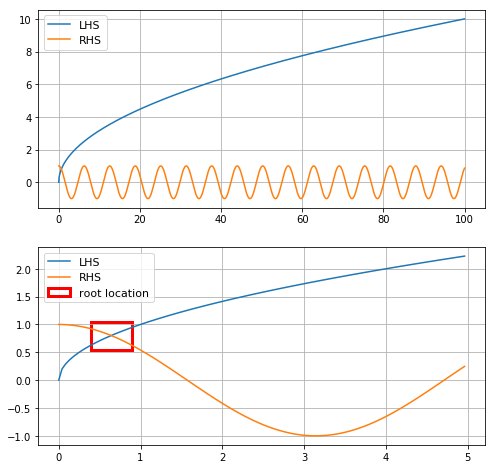

In [220]:
from matplotlib import patches

x = np.linspace(0, 100, 2500)

f = plt.figure(figsize=[8, 8])
ax1 = f.add_subplot(2, 1, 1)
ax2 = f.add_subplot(2, 1, 2)

ax1.plot(x, np.sqrt(x), label='LHS')
ax1.plot(x, np.cos(x), label='RHS')
ax1.legend(prop={'size': 11})
ax1.grid()

ax2.plot(x[0:125], np.sqrt(x[0:125]), label='LHS')
ax2.plot(x[0:125], np.cos(x[0:125]), label='RHS')

rect = patches.Rectangle((0.4, 0.55), 0.5, 0.5, edgecolor='red', facecolor='none', linewidth=3, label='root location')
ax2.add_patch(rect)
ax2.legend(prop={'size': 11})
ax2.grid()

plt.show()

Я не очень понял, что значит визуально выделить на графике приблизительную область, где находится корень. На глаз выделил прямоугольником более-менее маленькую область там, где графики пересекаются. Область, соответственно, $[0.4, 0.9] \times [0.55, 1.05]$.

In [207]:
def fixed_point(f, x0, eps=1e-5, maxiter=1000):
    """Find a root of $x = f(x)$ via fixed-point iteration algorithm from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    niter = 0
    error = 1
    
    while True:
        
        x = x0 - f(x0)
        error = np.linalg.norm(x0 - x)
        niter += 1
        
        if error <= eps or niter == maxiter:
            break
        
        x0 = x
        
    return x, niter

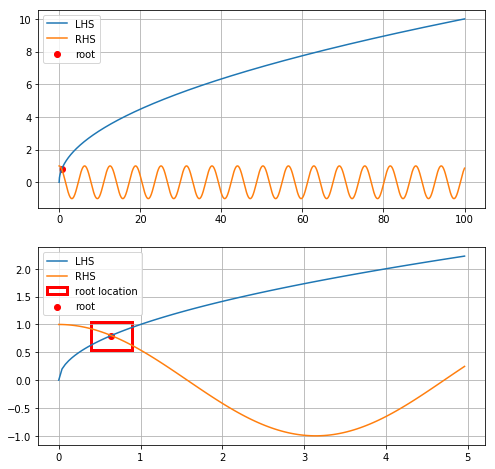

0.0009391307830810547 - время работы алгоритма.


In [269]:
f = lambda x: np.sqrt(x) - np.cos(x)

x0 = 0.5

import time

t1 = time.time()

root, niter = fixed_point(f, x0, eps=1e-5, maxiter=1000)

t2 = time.time()

x = np.linspace(0, 100, 2500)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(x, np.sqrt(x), label='LHS')
ax1.plot(x, np.cos(x), label='RHS')
ax1.scatter(root, np.cos(root), label='root', color='red', marker='o')
ax1.legend()
ax1.grid()

ax2.plot(x[0:125], np.sqrt(x[0:125]), label='LHS')
ax2.plot(x[0:125], np.cos(x[0:125]), label='RHS')

rect = patches.Rectangle((0.4, 0.55), 0.5, 0.5, edgecolor='red', facecolor='none', linewidth=3, label='root location')
ax2.add_patch(rect)
ax2.scatter(root, np.cos(root), label='root', color='red', marker='o')
ax2.legend()
ax2.grid()

plt.show()

print(t2 - t1, '- время работы алгоритма.')

In [226]:
def fixed_point_modify(f, x0, alpha, eps=1e-5, maxiter=1000):
    """Find a root of $x = f(x)$ via fixed-point iteration algorithm from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    niter = 0
    
    while True:
        
        x = x0 - alpha * f(x0)
        error = np.linalg.norm(x0 - x)
        niter += 1
        
        if error <= eps or niter == maxiter:
            break
        
        x0 = x
        
    return x, niter

Оптимальное значение $\alpha$ равно

$$
\alpha = \frac{2}{m + M},
$$

где $m < |f'(x^*)| < M$, $x^* \in \overline{B_{\varepsilon}(x)}$, $x$ -- корень.

$\overline{B_{\varepsilon}(x)} = [0.4, 0.9]$ была выбрана на глаз. Я выбирал $m$ и $M$ как $\min{|f'(x^*)|}$ и $\max{|f'(x^*)|}$ на этом отрезке, соответственно.

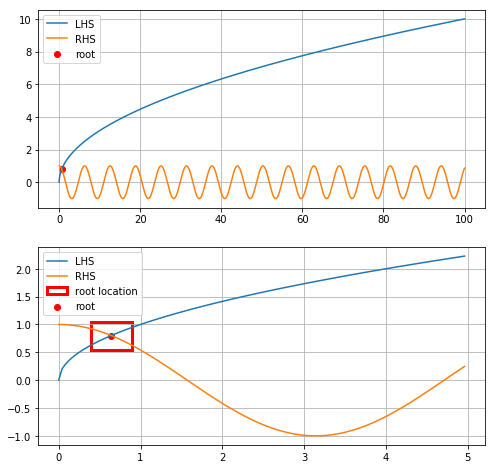

0.00038814544677734375 - время работы алгоритма.


In [270]:
fder = lambda x: 1 / (2 * np.sqrt(x)) + np.sin(x)

x = np.linspace(0, 100, 2500)

#visual location of the root
x1 = np.searchsorted(x, 0.4)
x2 = np.searchsorted(x, 0.4 + 0.5)

m = np.min(abs(fder(x[x1:x2])))
M = np.max(abs(fder(x[x1:x2])))

alpha_optimal = 2 / (m + M)


t1 = time.time()

x_optimal, niter_optimal = fixed_point_modify(f, x0, alpha_optimal, eps=1e-5, maxiter=1000)

t2 = time.time()

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(x, np.sqrt(x), label='LHS')
ax1.plot(x, np.cos(x), label='RHS')
ax1.scatter(x_optimal, np.cos(x_optimal), label='root', color='red', marker='o')
ax1.legend()
ax1.grid()

ax2.plot(x[0:125], np.sqrt(x[0:125]), label='LHS')
ax2.plot(x[0:125], np.cos(x[0:125]), label='RHS')

rect = patches.Rectangle((0.4, 0.55), 0.5, 0.5, edgecolor='red', facecolor='none', linewidth=3, label='root location')
ax2.add_patch(rect)
ax2.scatter(x_optimal, np.cos(x_optimal), label='root', color='red', marker='o')
ax2.legend()
ax2.grid()

plt.show()

print(t2 - t1, '- время работы алгоритма.')

При выборе оптимального значения $\alpha$ скорость работы алгоритма действительно выше, как и ожидалось, хоть и разница порядка 0.1 мс. Корни находятся одинаково хорошо.

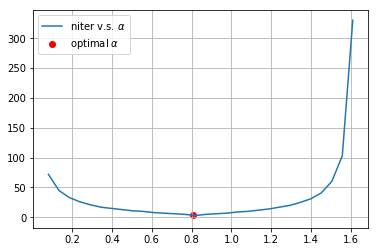

In [273]:
alpha_test, niter_test = np.linspace(0.1 * alpha_optimal, 2 * alpha_optimal, 30), []


for alpha in alpha_test:
    
    x, niter = fixed_point_modify(f, x0, alpha, eps=1e-5, maxiter=1000)
    niter_test.append(niter)

fig = plt.figure(figsize=[6, 4])
plt.plot(alpha_test, niter_test, label=r'niter v.s. $\alpha$')
plt.scatter(alpha_optimal, niter_optimal, color='red', label=r'optimal $\alpha$', marker='o')
plt.legend()
plt.grid()
plt.show()

Из графика зависимости количества итераций алгоритма от значения $\alpha$ видно, что минимум соответствует именно оптимальному значению.

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

Фрактал строится по следующему алгоритму:

1. Выбирается область отрисовки фрактала и разрешение (число точек points) и матрица изображения (fractal)

2. Проходимся по всем точкам, для каждой применяем алгоритм Ньютона для решения уравнения $x^3 = 1$, выбирая ее за $x_0$.

3. Смотрим, к какому корню сходится алгоритм с заданной точностью $\varepsilon = 10^{-5}$, записываем в соответствующее значение матрицы изображения число, отвечающее одному из трех цветов.

4. Создаем кастомную палитру, чтобы цвету каждого элемента матрицы соответствовало его значение.

5. Получаем картинку с помощью imshow.

In [276]:
f = lambda z: z**3 - 1

fder = lambda z: 3 * z**2

import cmath

points = 2000
eps = 1e-5

x_range = np.linspace(-2, 2, points)
y_range = np.linspace(-1, 1, points)

fractal = np.zeros(shape=(points, points))

for i in range(points):
    for j in range(points):
        x = x_range[i]
        y = y_range[j]
        z = complex(x,y)
        root, iteration = newton_iteration(f, fder, z, eps=1e-5, maxiter=1000)
        if abs(root - cmath.exp(2j*cmath.pi*0/3)) <= eps:
            fractal[i, j] = 1
        if abs(root - cmath.exp(2j*cmath.pi*1/3)) <= eps:
            fractal[i, j] = 2
        if abs(root - cmath.exp(2j*cmath.pi*2/3)) <= eps:
            fractal[i, j] = 3

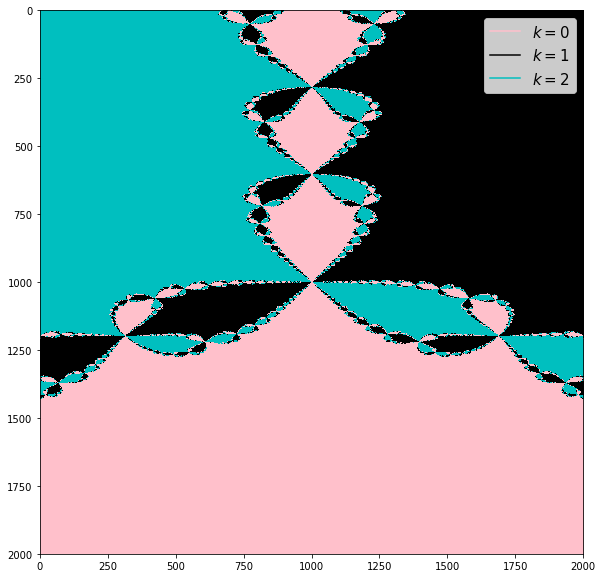

In [277]:
from matplotlib import colors

cmap = colors.ListedColormap(['pink', 'black', 'c'])
bounds = [0, 1, 2, 3]

plt.figure(figsize=[10, 10])

plt.plot(0, 0, color='pink', label=r'$k=0$')
plt.plot(0, 0, color='black', label=r'$k=1$')
plt.plot(0, 0, color='c', label=r'$k=2$')

plt.legend(prop={'size': 15})
plt.imshow(fractal, cmap=cmap)
plt.show()

Красиво :)